In [32]:
clear all
cd "/Users/Charlie/Dropbox/Bankers in the Ivory Tower Book/2 Our New Financial Oligarchy/Data/Boards 2000 to 2017"

use forbes400_alum_board_1989_2003_2017, clear
egen pehedge=rowtotal(pe hedge)
replace financedetail="non-financial" if financedetail==" non-financial"
gen nonfin=(financedetail=="non-financial" & technology!=1)

In [7]:
local pehedge "private equity & hedge"
local otherfin "other finance"
local technology "technology"
local nonfin "other"
quietly foreach var in pehedge otherfin nonfin technology {
gen top30bapriv`var'=(collegeschooltype==3)*100 if `var'==1
    label var top30bapriv`var' "``var''"
gen top30bapub`var'=(collegeschooltype==2)*100 if `var'==1
    label var top30bapub`var' "``var''"
gen top30mbapriv`var'=(mbaschooltype==3)*100 if `var'==1
    label var top30mbapriv`var' "``var''"
gen top30mbapub`var'=(mbaschooltype==2)*100 if `var'==1
    label var top30mbapub`var' "``var''"
gen top30jdpriv`var'=(jdschooltype==3)*100 if `var'==1
    label var top30jdpriv`var' "``var''"
gen top30jdpub`var'=(jdschooltype==2)*100 if `var'==1
    label var top30jdpub`var' "``var''"
}

In [22]:
set scheme plotplain

foreach control in priv pub {
foreach degree in ba mba jd {
foreach year in 1989 2003 2017 {
statplot top30`degree'`control'nonfin top30`degree'`control'tech ///
top30`degree'`control'otherfin top30`degree'`control'pehedge ///
if year==`year', name(top30`degree'`control'`year', replace) blabel(bar, format(%9.1f)) ///
ytitle("% with a top 30 `degree'") title(`year') ylabel(0(25)75)
}
}
}

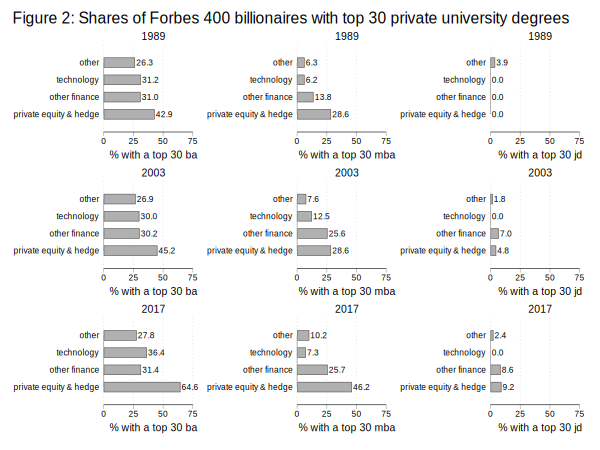

In [25]:
graph combine top30bapriv1989 top30mbapriv1989 top30jdpriv1989 ///
top30bapriv2003 top30mbapriv2003 top30jdpriv2003 ///
top30bapriv2017 top30mbapriv2017 top30jdpriv2017 ///
, xsize(16) ysize(12) scheme(plotplain) imargins(zero) name(Forbes400privatedegrees, replace) ///
title("Figure 2: Shares of Forbes 400 billionaires with top 30 private university degrees", ///
span justification(left))

In [26]:
graph export F2_Forbes400privatedegrees20200127.pdf, replace

(file F2_Forbes400privatedegrees20200127.pdf written in PDF format)


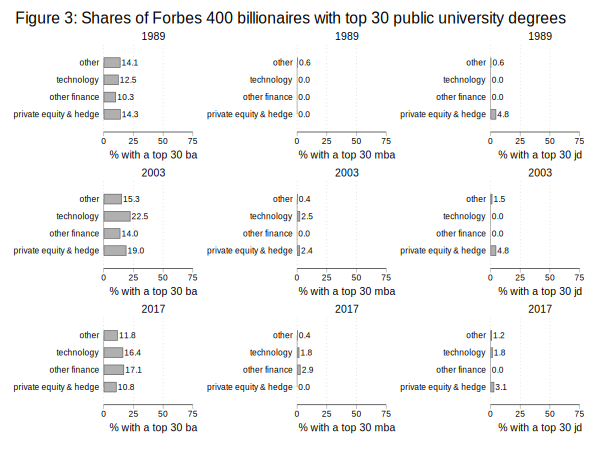

In [30]:
graph combine top30bapub1989 top30mbapub1989 top30jdpub1989 ///
top30bapub2003 top30mbapub2003 top30jdpub2003 ///
top30bapub2017 top30mbapub2017 top30jdpub2017 ///
, xsize(16) ysize(12) scheme(plotplain) imargins(zero) name(Forbes400privatedegrees, replace) ///
title("Figure 3: Shares of Forbes 400 billionaires with top 30 public university degrees", ///
span justification(left))

In [31]:
graph export F3_Forbes400publicdegrees20200127.pdf, replace

(file F3_Forbes400publicdegrees20200127.pdf written in PDF format)
